In [388]:
import os
import pandas as pd
import statistics
import yfinance as yf #Import from Yahoofinance API: https://python-yahoofinance.readthedocs.io/en/latest/api.html
import matplotlib.pyplot as plt #Import matplotlip


In [417]:
#answer = input("Would you like stored or fresh data? (stored, fresh)")
answer = 'stored'
if(answer == 'stored'):
    dataframe = pd.read_csv(os.path.dirname(os.path.realpath('SMI_Historical_Data.csv')) + '/SMI_Historical_Data.csv',   index_col=0)
    dataframe['Close'] = dataframe['Price'].str.replace(',','').astype(float)
    dataframe['Change %'] = dataframe['Change %'].str.replace('%','').astype(float)
    dataframe = dataframe.iloc[::-1]


if(answer == 'fresh'):
    # yf.download gets data from SMI Index (Ticker) with a span from April 2020 until March 2022 in monthly intervals
    dataframe = pd.DataFrame(yf.download(tickers=['^SSMI'], start='2020-04-01', end='2022-03-23'))

    #dataframe_fresh.index = pd.to_datetime(dataframe_fresh.index, format='%dd.%mm.%Y'

dataframe

,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,
Apr 20,"9,629.40","9,311.92","9,948.84","9,036.73",1.72B,3.41,9629.40
May 20,"9,831.49","9,618.93","9,966.05","9,389.66",1.48B,2.10,9831.49
Jun 20,"10,045.30","9,874.84","10,291.46","9,633.20",1.75B,2.17,10045.30
Jul 20,"10,005.90","10,027.45","10,535.33","9,984.99",1.27B,-0.39,10005.90
Aug 20,"10,135.56","10,013.36","10,356.75","9,999.55",903.60M,1.30,10135.56
Sep 20,"10,187.00","10,228.97","10,591.66","10,091.98",1.36B,0.51,10187.00
Oct 20,"9,587.15","10,256.95","10,407.01","9,494.52",1.25B,-5.89,9587.15
Nov 20,"10,476.43","9,595.66","10,644.22","9,556.93",1.52B,9.28,10476.43
Dec 20,"10,703.51","10,473.33","10,749.68","10,237.94",1.11B,2.17,10703.51


In [435]:

#Create Dataframe in pandas

dataframe['Renditeverteilung'] = round(dataframe['Close'] * 100 / dataframe['Close'].shift() - 100, 2)



dataframe['diskrete Rendite'] = (dataframe['Close']/dataframe['Close'].shift() - 1)*100



if dataframe['Renditeverteilung'].isnull().values.any() or dataframe['diskrete Rendite'].isnull().values.any() :
    dataframe["Renditeverteilung"].fillna(dataframe['Change %'], inplace = True)
    dataframe["diskrete Rendite"].fillna(dataframe['Change %'], inplace = True)

geomid = pow(dataframe['diskrete Rendite'][0] * dataframe['diskrete Rendite'][len(dataframe['diskrete Rendite'])-1],1/2)

print("Median \t\t\t\t\t\t\t " + str(dataframe['Renditeverteilung'].median()) + " %")
print("Erste Quartille \t\t\t\t" + str(dataframe['Renditeverteilung'].describe()['25%']) + " %")
print("Arithmetische Mittel (ex ante) \t " + str(dataframe['diskrete Rendite'].mean()) + " %")
print("Geometrisches Mittel (ex post) \t " + str(geomid))


df = pd.DataFrame(index=['2022-03-22'])
df.index = pd.to_datetime(df.index)
df['Min_Prediction_Value'] = dataframe['Renditeverteilung'].median() - statistics.pstdev(dataframe['Renditeverteilung'])
df['Median'] = dataframe['Renditeverteilung'].median()
df['Max_Prediction_Value'] = dataframe['Renditeverteilung'].median()+ statistics.pstdev(dataframe['Renditeverteilung'])

df




#TODO Add boxplot - Hetter weischwie de geili




Median 							 1.78 %
Erste Quartille 				-0.455 %
Arithmetische Mittel (ex ante) 	 1.2207792244340074 %
Geometrisches Mittel (ex post) 	 2.8539855171416204


,Min_Prediction_Value,Median,Max_Prediction_Value
2022-03-22,-1.795206,1.78,5.355206


In [419]:
st_dev = statistics.pstdev(dataframe['Renditeverteilung'])
print("Standard deviation of the given list: " + str(st_dev))

Standard deviation of the given list: 3.5752058992766025


/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

Modified Sample pandas DataFrame:

Standard deviation of the given list: 1.1248113052139241


/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s_row,ignore_index=True)
/var/folders/6t/58y6yv811w10wnszm6q68gph0000gn/T/ipykernel_33625/1739173925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

,Price,Open,High,Low,Vol.,Change %,Close,Renditeverteilung,diskrete Rendite
0,"9,629.40","9,311.92","9,948.84","9,036.73",1.72B,3.410000,9.629400e+03,3.410000,3.410000
1,"9,831.49","9,618.93","9,966.05","9,389.66",1.48B,2.100000,9.831490e+03,2.100000,2.098677
2,"10,045.30","9,874.84","10,291.46","9,633.20",1.75B,2.170000,1.004530e+04,2.170000,2.174747
3,"10,005.90","10,027.45","10,535.33","9,984.99",1.27B,-0.390000,1.000590e+04,-0.390000,-0.392223
4,"10,135.56","10,013.36","10,356.75","9,999.55",903.60M,1.300000,1.013556e+04,1.300000,1.295835
...,...,...,...,...,...,...,...,...,...
320,,,,,,1.130354,1.716462e+06,1.130354,1.130354
321,,,,,,1.128959,1.735840e+06,1.128959,1.128959
322,,,,,,1.127570,1.755413e+06,1.127570,1.127570
323,,,,,,1.126187,1.775182e+06,1.126187,1.126187


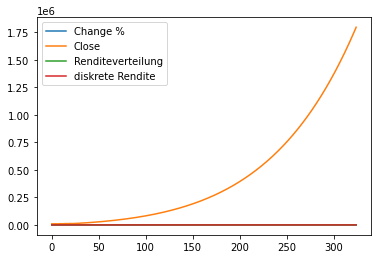

In [415]:
for i in range(0, 100):
    st_dev = statistics.pstdev(dataframe['Renditeverteilung'])
    s_row = pd.Series([df['Median']], index=['2022-03-22'])

# Append the above pandas Series object as a row to the existing pandas DataFrame
# Using the DataFrame.append() function
    dataframe = dataframe.append(s_row,ignore_index=True)

# Print the modified pandas DataFrame object after addition of a row
print('Modified Sample pandas DataFrame:\n')
print("Standard deviation of the given list: " + str(st_dev))
dataframe.plot()
dataframe


IndexError: index 24 is out of bounds for axis 0 with size 24

12491.56118


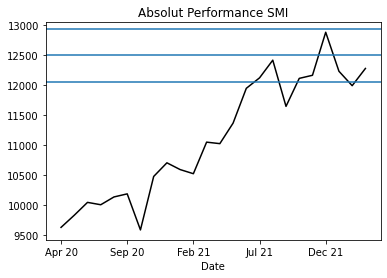

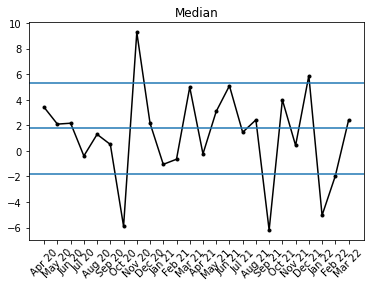

In [454]:
#Graph Calc
dataframe["Close"].plot(title="Absolut Performance SMI", color='black')
value = dataframe['Close'][-1] * (dataframe['Renditeverteilung'].median() / 100 + 1)
print(value)
plt.axhline(y=value)
plt.axhline(y=dataframe['Close'][-1] * (df['Max_Prediction_Value'][-1]  / 100 + 1))
plt.axhline(y=dataframe['Close'][-1] * (df['Min_Prediction_Value'][-1]  / 100 + 1))

plt.show()


#Generates Plot chart with Median as line.

plt.figure()
plt.plot(dataframe.index,dataframe['Renditeverteilung'], '.-', color='black')
plt.axhline(y=dataframe['Renditeverteilung'].median() + statistics.pstdev(dataframe['Renditeverteilung']))
plt.axhline(y=dataframe['Renditeverteilung'].median())
plt.axhline(y=dataframe['Renditeverteilung'].median() - statistics.pstdev(dataframe['Renditeverteilung']))

plt.title('Median')
plt.xticks(rotation=45)
plt.show()


